# IDEAL COMPARISON

## Preface

If you have checked out the other notebook `eda.ipynb` where I did **Exploratory Data Analysis**, you can see that the score distributions for each subject look vastly different, with some right-skewed ("KTPL" - Econs and Law), and some left-skewed ("TOAN" - Math).

As the number of entries for each subject scores is enough diverse (at least ~1000 students, up to ~40000 per subjects), I suspect that the reason for this non-comformity is that **test exams for each subject were not created equally** (that is, some exams are innately more difficult than others), and not because "students perform better at this subject and worse at the other".

On the basis of that assumption, in this notebook, I decided to:
- Standardize data for each subject using quantile transformer
- Compare the results of the standardized data with the original raw data
- [to be done] Apply the results to see changed in the cutoff scores of some programs in Hanoi University of Science and Technology
- Some small comments on this year's THPTQG exam :)

## Prerequisites
1. Make sure the file `thanhhoa_processed.csv` is located in `data/processed/`. If not, refer to the script files in `scripts/` for detailed instructions on how to get the dataset file.
2. Read outputs and remarks in the other notebook, `notebooks/eda.ipynb` for Exploratory Data Analysis. This is not compulsory, but I highly recommend you to check it out first.

## [Code] Load dependencies, dataset; Declare constants

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer

print("Dependencies loaded successfully")

path = "../data/processed/thanhhoa_processed.csv"
df = pd.read_csv(path, index_col="STT")

print("Dataset loaded successfully")

SUBJ = ["TOAN", "VAN", "LI", "HOA", "SINH", "SU", "DIA", "KTPL", "T_ANH"]
SUBJ_QT = [s + "_qt" for s in SUBJ]
COMB = ["A00", "A01", "B00", "C00", "D01"]
COMB_QT = [s + "_qt" for s in COMB]
RANK = ["RANK_" + s for s in COMB]
RANK_QT = [s + "_qt" for s in RANK]

print("Constant lists declared")

Dependencies loaded successfully
Dataset loaded successfully
Constant lists declared


## [Code] Apply Quantile transformer

In [92]:
qt = QuantileTransformer(output_distribution="uniform", n_quantiles=1000, random_state=0) # 1000 quantiles

for s in SUBJ:
    col = df[s].to_numpy().reshape(-1, 1)
    mask = ~np.isnan(col[:, 0])
    transformed = np.full(col.shape[0], np.nan, dtype=float) # turns into 2D column vector ||| NaN stays as NaN || type: np.ndarray
    
    if mask.sum() > 0: # fit_transform only on non-nulls
        transformed_vals = qt.fit_transform(col[mask])
        transformed[mask] = transformed_vals.ravel() * 10 # map 0-1 to 0-10 ||| .ravel(): flatten 2D
    
    df[s + "_qt"] = transformed
    df[s + "_qt"] = df[s + "_qt"].round(2)

# Examine new data
# print(df[SUBJ + SUBJ_QT].head())

print("Quantile transformer applied successfully")

Quantile transformer applied successfully


## [Code] Compute standardized subject combination scores and rankings

In [93]:
df["A00_qt"] = df[["TOAN_qt", "LI_qt", "HOA_qt"]].sum(axis = 1, min_count=3)
df["A01_qt"] = df[["TOAN_qt", "LI_qt", "T_ANH_qt"]].sum(axis = 1, min_count=3)
df["B00_qt"] = df[["TOAN_qt", "HOA_qt", "SINH_qt"]].sum(axis = 1, min_count=3)
df["C00_qt"] = df[["VAN_qt", "SU_qt", "DIA_qt"]].sum(axis = 1, min_count=3)
df["D01_qt"] = df[["TOAN_qt", "VAN_qt", "T_ANH_qt"]].sum(axis = 1, min_count=3)

# print(df[COMB + COMB_QT])

print("Subject combination scores for transformed data generated")

for s in COMB + COMB_QT:
    df["RANK_" + s] = df[s].rank(method='min', ascending=False)

print("Ranking columns generated successfully")

# print(df[RANK + RANK_QT])

# print(df.loc[df["SBD"] == 28002212, RANK + RANK_QT])

Subject combination scores for transformed data generated
Ranking columns generated successfully


## [Code] Top students in Raw and Transformed data

In [110]:
print("Top 5 students in raw combination scores:\n")

for s in COMB:
    print(df.loc[df["RANK_" + s] <= 5, [s, s + "_qt", "RANK_" + s, "RANK_" + s + "_qt"]].sort_values(by="RANK_" + s, ascending=True))
    print("\n")

Valedictorians in raw combination scores:

          A00  A00_qt  RANK_A00  RANK_A00_qt
STT                                         
587258  29.75   29.84       1.0         12.0
594083  29.75   29.73       1.0         15.0
606997  29.75   29.73       1.0         15.0
571532  29.50   29.65       4.0         27.0
571709  29.50   29.97       4.0          1.0
575836  29.50   29.97       4.0          1.0
587115  29.50   29.57       4.0         38.0
587341  29.50   29.65       4.0         27.0
593082  29.50   29.65       4.0         27.0


          A01  A01_qt  RANK_A01  RANK_A01_qt
STT                                         
572547  29.50   29.72       1.0          3.0
606925  29.50   29.98       1.0          1.0
571900  29.00   29.93       3.0          2.0
571335  28.50   29.65       4.0          6.0
593719  28.25   29.38       5.0         14.0


          B00  B00_qt  RANK_B00  RANK_B00_qt
STT                                         
572471  28.75   29.67       1.0          3.0
581663  

In [115]:
print("Top 5 students in transformed combination scores:\n")

for s in COMB:
    print(df.loc[df["RANK_" + s + "_qt"] <= 5, [s, s + "_qt", "RANK_" + s, "RANK_" + s + "_qt"]].sort_values(by="RANK_" + s + "_qt", ascending=True))
    print("\n")

Top 5 students in transformed combination scores:

         A00  A00_qt  RANK_A00  RANK_A00_qt
STT                                        
571709  29.5   29.97       4.0          1.0
575836  29.5   29.97       4.0          1.0
575215  29.0   29.85      18.0          3.0
579780  29.0   29.85      18.0          3.0
584483  29.0   29.85      18.0          3.0
586143  29.0   29.85      18.0          3.0
591104  29.0   29.85      18.0          3.0
593628  29.0   29.85      18.0          3.0
604121  29.0   29.85      18.0          3.0
607016  29.0   29.85      18.0          3.0
609035  29.0   29.85      18.0          3.0


          A01  A01_qt  RANK_A01  RANK_A01_qt
STT                                         
606925  29.50   29.98       1.0          1.0
571900  29.00   29.93       3.0          2.0
572547  29.50   29.72       1.0          3.0
572555  27.75   29.71      11.0          4.0
571749  27.50   29.67      13.0          5.0


          B00  B00_qt  RANK_B00  RANK_B00_qt
STT          

### Remarks

**(1/3)**

For most cases, high rankings in the original data correspond to high rankings in transformed data (top 5 usually maps to top 30). Except (as you can clearly see from the output), in the case of `D01` combination (`TOAN` - Math, `VAN` - Literature, `T_ANH` - English). One of the two valedictorians in the original data, ends up at rank 456 in the transformed data.

I want you to inspect this anomaly further with me, by examining students with `index = [572547, 606925, 571900]`

In [123]:
D01_COLS = ["TOAN", "TOAN_qt", "VAN", "VAN_qt", "T_ANH", "T_ANH_qt", "D01", "D01_qt"]
D01_NOTABLES = [572547, 606925, 571900]

for i in D01_NOTABLES:
    print(df.loc[i, D01_COLS])
    print("\n")

TOAN        10.00
TOAN_qt     10.00
VAN          8.25
VAN_qt       6.86
T_ANH        9.75
T_ANH_qt     9.99
D01         28.00
D01_qt      26.85
Name: 572547, dtype: float64


TOAN         9.75
TOAN_qt      9.99
VAN          8.25
VAN_qt       6.86
T_ANH        9.75
T_ANH_qt     9.99
D01         27.75
D01_qt      26.84
Name: 606925, dtype: float64


TOAN        10.00
TOAN_qt     10.00
VAN          8.50
VAN_qt       7.87
T_ANH        9.00
T_ANH_qt     9.93
D01         27.50
D01_qt      27.80
Name: 571900, dtype: float64




**(2/3)**

Notice something yet? Their `VAN` (Literature) scores are all penalized, unlike their `TOAN` (Math) and `T_ANH` (English) scores. Although their raw Literature scores would be perceived as "high", after normalization, they become average.

As you can see in the raw score distribution of the 3 subjects below, Literature stands out as being incredibly right-skewed, with many students tightly packed in the 7.5-8.5 score range.

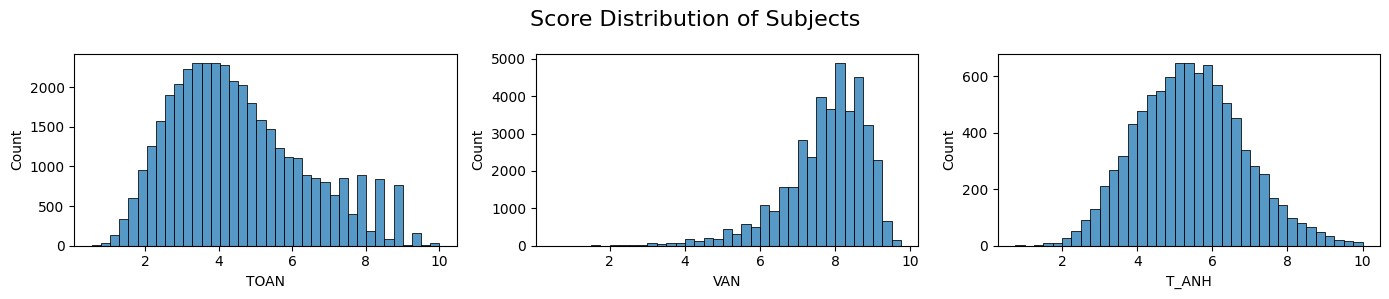

In [134]:
plt.figure(figsize=(14,3))

plt.subplot(1, 3, 1)
sns.histplot(df["TOAN"], binwidth=0.25)

plt.subplot(1, 3, 2)
sns.histplot(df["VAN"], binwidth=0.25)

plt.subplot(1, 3, 3)
sns.histplot(df["T_ANH"], binwidth=0.25)

plt.suptitle("Score Distribution of Subjects", fontsize=16)
plt.tight_layout()
plt.show()

**(3/3)**

And you may argue: *"`LI` (Physics), `SU` (History), `DIA` (Geography) also have right-skewed distribution, just that the graph is not as steep as in the case of `VAN` (Literature). Why isn't there a massive mismatch between the rankings of raw vs transformed data in the subject combinations `A00` (`TOAN`, `LI`, `HOA`), `A01` (`TOAN`, `LI`, `ANH`), and `C00` (`VAN`, `SU`, `DIA`)?"*

I would put forward two arguments:
1. It's precisely because the graph is not as "squished in the middle" as in the case of `VAN` that (primarily) causes the mismatch in the rankings. A tiny change in the score of `VAN` when one is in the 7-9 bunch, would cause a remarkable change in quantile ranking, and thus the quantile-transformed score of the student.
2. Low correlation between `VAN` and `T_ANH` (0.16), `TOAN` and `VAN`(0.35) raw scores also amplifies this mismatch. In other subject combinations, with higher correlation between subjects (0.5-0.8, refer to the heatmap in `notebooks/eda.ipynb` for more details), a high score in one subject could counterbalance distortions in other subjects' scores. This compensation is much less profound in `D01` combination, making the mismatch especially noticeable.

## Conclusion

What does this mean for the Ministry of Education and Training (MoED) in general, and their THPTQG test makers in particular?

To bring it up once again, disregard of some university's complex score conversion systems, all the subjects (and thus subject combinations) are treated equally in evaluating high school graduation criteria and in university admissions. This creates a huge unfairness between, say, a student who chose `T_ANH` and a student who chose `KTPL`.

To make it worse, this year THPTQG policy only allows students to take maximum 4 subjects rather than 6 subjects as before. This immensely limits the number of subject combinations they can choose from (4C3 = 4 vs 6C3 = 20), so, less hope for students who accidentally chose hard subjects.

The results are not reversible, of course, but I argue it's important to call this out to call for more rigorous and standardized test-making process, making sure the results of all exams are comparable regardless of subjects. Hence, preventing this problem from ever happening again in the future and ensuring a fair education system.

### Bonus

I did participate in this exam. Look at my stats below!

Hooray I'm my province's valedictorian in TWO subject combinations!!! How cool!!! But yes I'm fully aware I have kind of backfired myself horribly by making this notebook.

Anyway thank you for having spent your time reading me yapping from start to end, if you have.

In [132]:
print(df.loc[572547]) # In case this number looks familiar, I'm one of the 3 subjects I pointed out somewhere above

SBD            28002212.00
MA_TINH              28.00
TOAN                 10.00
VAN                   8.25
LI                    9.75
HOA                    NaN
SINH                   NaN
SU                     NaN
DIA                    NaN
KTPL                   NaN
T_ANH                 9.75
A00                    NaN
A01                  29.50
B00                    NaN
C00                    NaN
D01                  28.00
TOAN_qt              10.00
VAN_qt                6.86
LI_qt                 9.73
HOA_qt                 NaN
SINH_qt                NaN
SU_qt                  NaN
DIA_qt                 NaN
KTPL_qt                NaN
T_ANH_qt              9.99
A00_qt                 NaN
A01_qt               29.72
B00_qt                 NaN
C00_qt                 NaN
D01_qt               26.85
RANK_A00               NaN
RANK_A01              1.00
RANK_B00               NaN
RANK_C00               NaN
RANK_D01              1.00
RANK_A00_qt            NaN
RANK_A01_qt           3.00
R